In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)
gs = GridSpec(nrows=2, ncols=3)

In [ ]:
df = pd.DataFrame([

    ['Martin A.', 'VWL', 0, 924],
    ['Ute A.', 'Sozialwissenschaften', 1, 789],
    ['Wilhelm A.', 'BWL', 0, 1365],
    ['Kurt B.', 'BWL', 1, 683],
    ['Sylvia B.', 'Sozialwissenschaften', 1, 744],
    ['Elke D.', 'Sozialwissenschaften', 2, 640],
    ['Klaus D.', 'Sozialwissenschaften', 2, 631],
    ['Theo E.', 'VWL', 1, 814],
    ['Jan F.', 'Politikwissenschaften', 1, 778],
    ['Elvira G.', 'BWL', 0, 1062],
    ['Karl H.', 'BWL', 0, 1230],
    ['Andreas K.', 'VWL', 1, 700],
    ['Thomas K.', 'BWL', 0, 850],
    ['Chris L.', 'Sozialwissenschaften', 3, 641],
    ['Uwe L.', 'Politikwissenschaften', 2, 640],
    ['Axel M.', 'BWL', 0, 850],
    ['Maria M.', 'BWL', 1, 683],
    ['Ruth M.', 'Sozialwissenschaften', 0, 616],
    ['Bärbel N.', 'BWL', 1, 683],
    ['Armin R.', 'BWL', 2, 683],
    ['Christa R.', 'VWL', 1, 660],
    ['Bernd S.', 'BWL', 1, 1440],
    ['Claudia S.', 'Sozialwissenschaften', 3, 794],
    ['Edmund T.', 'VWL', 0, 660],
    ['Claudia W.', 'Sozialwissenschaften', 1, 640]

],
    columns=['Name', 'Studiengang', 'Zahl_der_Geschwister', 'Monatseinkommen_(in_EUR)'])

In [50]:
"""Aufgabe A -> absolute Häufigkeitsverteilung"""
num_stud = df.Studiengang.value_counts()
"""Aufgabe A -> relative Häufigkeitsverteilung"""
rel_freq_stud = num_stud.values / len(df)

print(num_stud)
print('p_i =', rel_freq_stud)

BWL                      10
Sozialwissenschaften      8
VWL                       5
Politikwissenschaften     2
Name: Studiengang, dtype: int64
p_i = [0.4  0.32 0.2  0.08]


In [49]:
"""Aufgabe B -> relative Häufigkeit"""
num_ges = df.Zahl_der_Geschwister.value_counts().sort_index()
rel_freq_ges = num_ges.values / len(df)
"""Aufgabe B -> relative Summenhäufigkeit"""
hsum = num_ges.cumsum()
Psum = rel_freq_ges.cumsum()

print(num_ges)
print(hsum)
print('p_i =', rel_freq_ges)
print('F_i =', Psum)

0     8
1    11
2     4
3     2
Name: Zahl_der_Geschwister, dtype: int64
0     8
1    19
2    23
3    25
Name: Zahl_der_Geschwister, dtype: int64
p_i = [0.32 0.44 0.16 0.08]
F_i = [0.32 0.76 0.92 1.  ]


Text(0.5, 1.0, 'Kumulierte absolute Häufigkeit Geschwister')

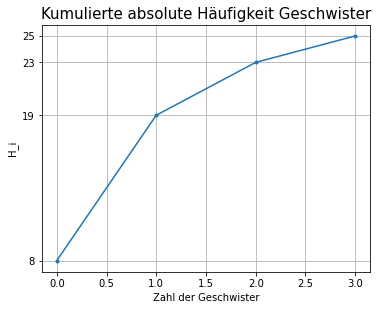

In [ ]:
#abs Häufigkeit plot
fig = plt.figure(figsize=(20, 10))
x = list(num_ges.sort_index().index)
y = num_ges.sort_index().cumsum().values
ax0 = plt.subplot(gs[0,0])
start, end = ax0.get_ylim()
ax0.yaxis.set_ticks(np.arange(start, end, 1))
ax0.plot(x,y,marker='.')
ax0.set_yticks(y)
ax0.set_ylabel('H_i')
ax0.set_xlabel('Zahl der Geschwister')
ax0.grid()
plt.title('Kumulierte absolute Häufigkeit Geschwister', fontsize=15)

Text(0.5, 1.0, 'relative Häufigkeit Geschwister')

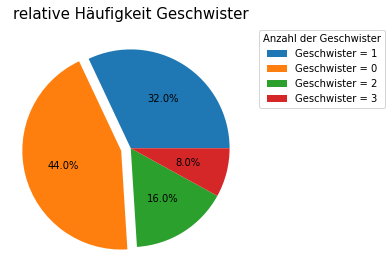

In [39]:
#rel Häufigkeit plot
fig = plt.figure(figsize=(20, 10))
rel_freq_ges_labels = ['Geschwister = 1', 'Geschwister = 0', 'Geschwister = 2', 'Geschwister = 3']
myexplode = [0, 0.1, 0, 0]
ax = plt.subplot(gs[0,1])
ax.pie(rel_freq_ges, explode=myexplode, autopct='%0.1f%%')
ax.legend(labels=rel_freq_ges_labels, title = 'Anzahl der Geschwister', loc='upper left', bbox_to_anchor=(1,1))
plt.title('relative Häufigkeit Geschwister', fontsize=15)

Text(0.5, 0, 'Zahl der Geschwister')

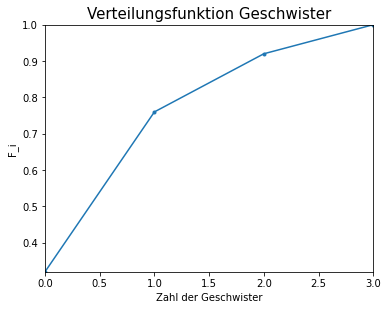

In [ ]:
#Verteilungsfunktion plot
fig = plt.figure(figsize=(20, 10))
ax2 = plt.subplot(gs[0,2])
ax2.plot(Psum, marker='.')
ax2.set_xlim(0, max(num_ges.index))
ax2.set_ylim(min(Psum), max(Psum))
plt.title('Verteilungsfunktion Geschwister',fontsize=15)
ax2.set_ylabel('F_i')
ax2.set_xlabel('Zahl der Geschwister')

In [48]:
"""Aufgabe C"""
income = df['Monatseinkommen_(in_EUR)'].values
split_income_by_100 = pd.cut(list(income), [600, 699, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]).value_counts()
rel_income = split_income_by_100.values / len(df)
rel_income_Psum = rel_income.cumsum()

print(split_income_by_100)
print('p_i =', rel_income)
print('F_i =', rel_income_Psum)

(600, 699]      12
(699, 800]       5
(800, 900]       3
(900, 1000]      1
(1000, 1100]     1
(1100, 1200]     0
(1200, 1300]     1
(1300, 1400]     1
(1400, 1500]     1
dtype: int64
p_i = [0.48 0.2  0.12 0.04 0.04 0.   0.04 0.04 0.04]
F_i = [0.48 0.68 0.8  0.84 0.88 0.88 0.92 0.96 1.  ]


Text(0.5, 0, 'Einkommen X')

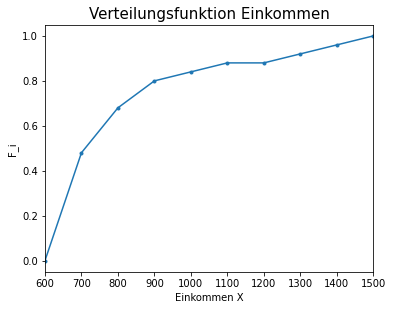

In [ ]:
#Verteilungsfunktion
fig = plt.figure(figsize=(20, 10))
ax3 = plt.subplot(gs[1,0])
y3 = np.insert(rel_income_Psum, 0, 0, axis=0)
x3 = [600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
ax3.plot(x3, y3, marker='.')
ax3.set_xlim(min(x3), max(x3))
plt.title('Verteilungsfunktion Einkommen',fontsize=15)
ax3.set_ylabel('F_i')
ax3.set_xlabel('Einkommen X')

Text(0.5, 0, 'Einkommen X')

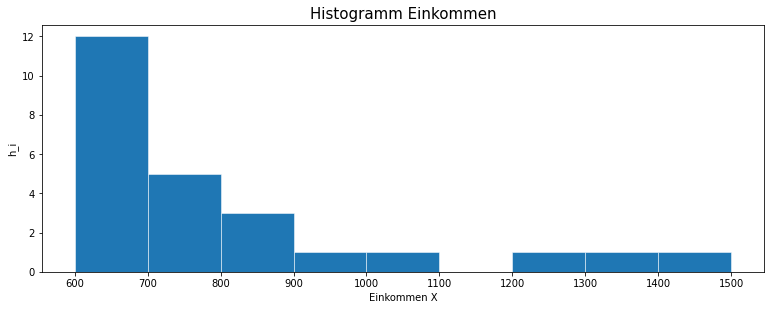

In [ ]:
#Histogramm
fig = plt.figure(figsize=(20, 10))
ax4 = plt.subplot(gs[1,1:])
bins = [600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
ax4.hist(income, bins=bins, linewidth=0.5, edgecolor="white")
plt.title('Histogramm Einkommen',fontsize=15)
ax4.set_xticks(bins)
ax4.set_ylabel('h_i')
ax4.set_xlabel('Einkommen X')

In [ ]:
"""Aufgabe D"""
less_1000 = np.select([income<1000], [income])
a = less_1000[less_1000 != 0]
a_F = len(a)/len(df)

more_750 = np.select([income>750], [income])
b = more_750[more_750 != 0]
b_F = len(b)/len(df)

less_1300 = np.select([income<1300], [income])
c = less_1300[less_1300 != 0]
c_F = (len(c) - len(a))/len(df)

print('a)', a_F)
print('b)', b_F)
print('c)', c_F)

a) 0.84
b) 0.44
c) 0.08
